## Определение факторов успешности компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, с оценками пользователей и экспертов, для разных жанров и платформ (например, Xbox или PlayStation). 

Нужно выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина, который продает компьютерные игры по всему миру.

В датасете доступны данные до 2016 года (данные за 2016 год - не полностью). Нужно спланировать кампании на 2017-й.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns

**Содержание** <a id = 'contents'></id>

1. [Знакомство с данными](#start)
2. [Предобработка данных](#preprocessing)
3. [Исследовательский анализ данных](#research)
4. [Проверка гипотез](#hypotheses)
5. [Выводы](#summary)

## Знакомство с данными <a id = 'start'></id>

In [2]:
games = pd.read_csv('games.csv')
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


В датасете содержатся данные по компьютерным играм: название, платформа, год выпуска, жанр, совокупные продажи игры в миллионах копий по регионам (в Северной Америке, Европе, Японии и остальном мире), а также оценка критиков (по 100-балльной шкале), пользовательский рейтинг (по 10-балльной шкале) и возрастной рейтинг от организации ESRB.

## Предобработка данных <a id = 'preprocessing'></id>

In [3]:
#приведем названия столбцов к нижнему регистру для удобства работы
games.columns = games.columns.map(str.lower)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков и исправление типов данных

In [4]:
#выясним количество строк в датасете, типы данных в разных столбцах и количество пропусков
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Приведем значения столбцов `platform` и `rating` к категориальному типу данных, `year_of_release` - к целочисленным значениям *int*, а `user_score` - к числовому типу *float*. 


- Больше всего пропусков - в столбцах с оценками критиков, пользовательским рейтингом и возрастным рейтингом. Пропусков слишком много, чтобы их можно было удалить. К тому же, в тех строках, где отсутствует информация о рейтинге, есть другая важная информация (продажи, платформа, жанр, год выпуска). Важно сохранить эти данные для анализа.


- Также есть небольшое количество пропущенных значений в столбце с годом выпуска. Год выпуска - не самая ценная информация в нашем датасете. Не будем избавляться от строк с пропущенным годом.

In [5]:
#строки с отсутствующим названием не несут в себе ценной информации
games[games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
#таких строк всего 2, удалим их
games = games.drop(games[games.name.isna()].index)

Приведем значения столбцов `platform` и `rating` к категориальному типу данных:

In [7]:
games.genre = games.genre.astype('category')
games.genre.dtype

CategoricalDtype(categories=['Action', 'Adventure', 'Fighting', 'Misc', 'Platform',
                  'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'Simulation',
                  'Sports', 'Strategy'],
                 ordered=False)

In [8]:
games.rating = games.rating.astype('category')
games.rating.dtype

CategoricalDtype(categories=['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T'], ordered=False)

Приведем данные в столбце `year_of_release` к целочисленным значениям *int*, заменив пропуски нулями.

In [9]:
games.year_of_release = games.year_of_release.fillna(0).astype('int')

Приведем значения столбца `user_score` к числовому типу *float*, но сначала разберемся с пропусками в этом столбце:

In [10]:
games.user_score.value_counts(dropna = False, normalize = True)

NaN    0.400826
tbd    0.145037
7.8    0.019386
8      0.017352
8.2    0.016873
         ...   
0.5    0.000120
1.5    0.000120
1      0.000120
9.7    0.000060
0      0.000060
Name: user_score, Length: 97, dtype: float64

Помимо пропущенных значений NaN, есть еще значение 'tbd' - по сути, тоже пропуск, т.к. ничего нам не говорит о пользовательском рейтинге игры. 

Сокращение 'TBD' обычно обозначает "to be determined" ("подлежит определению", "будет определено").

Можно предположить, что так обозначен пользовательский рейтинг игр, которые вышли недавно, или же вышли давно, но не получили достаточно продаж или пользовательских оценок.

In [11]:
games[(games.user_score != 'tbd') & (~games.user_score.isna())][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean() \
/ games[games.user_score == 'tbd'][['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].mean()

na_sales        2.981433
eu_sales        5.167706
jp_sales       21.670130
other_sales     5.004893
dtype: float64

Похоже на правду: средние продажи игр с заполненным пользовательским рейтингом, по меньшей мере, в 3-5 раз выше, чем игр с рейтингом, обозначенным **tbd**. 

Для наших целей не имеет большого значения, почему отсутствует информация о пользовательском рейтинге: потому что игра не набрала достаточно продаж и оценок или по какой-то другой причине. 

Приведем столбец к типу *float*, сохранив все пропуски в этом столбце как пропущенные значения **NaN**:

In [12]:
games.user_score = pd.to_numeric(games.user_score, errors = 'coerce')
games.user_score.dtype

dtype('float64')

In [13]:
games.user_score.value_counts(dropna = False, normalize = True)

NaN    0.545863
7.8    0.019386
8.0    0.017352
8.2    0.016873
8.3    0.015198
         ...   
1.1    0.000120
2.3    0.000120
1.5    0.000120
0.0    0.000060
9.7    0.000060
Name: user_score, Length: 96, dtype: float64

Жаль, что для большей части игр, представленных в датасете, отсутствует пользовательский рейтинг. Ничего не поделаешь: будем работать с тем, что есть.

Осталось разобраться с пропусками в столбцах с оценками критиков и возрастным рейтингом.

In [14]:
games.critic_score.value_counts(dropna = False, normalize = True)

NaN     0.513133
70.0    0.015317
71.0    0.015198
75.0    0.014659
78.0    0.014360
          ...   
20.0    0.000180
13.0    0.000060
17.0    0.000060
22.0    0.000060
21.0    0.000060
Name: critic_score, Length: 83, dtype: float64

In [15]:
games.rating.value_counts(dropna = False, normalize = True)

NaN     0.404715
E       0.238736
T       0.177167
M       0.093520
E10+    0.084964
EC      0.000479
RP      0.000180
K-A     0.000180
AO      0.000060
Name: rating, dtype: float64

Для 51% игр отсутствуют данные об оценках критиков, для 40% - возрастной рейтинг. Интересно, эти срезы данных пересекаются? Сколько в нашем датасете игр, для которых не указаны ни пользовательский рейтинг, ни средняя оценка критиков, ни возрастной рейтинг?

In [16]:
len(games[(games.critic_score.isna()) & (games.user_score.isna()) & (games.rating.isna())]) / len(games)

0.3987913600191468

Таких почти 40%. Если нет других источников, откуда мы могли бы взять эти данные, придется работать с тем, что есть.

Вернемся к возрастному рейтингу. Некоторые обозначения встречаются настолько редко, что будут только мешать в работе. Скорее всего, их можно заменить близкими по смыслу рейтингами или вовсе удалить.

In [17]:
games.rating.value_counts(dropna = False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

- EC - для детей от 3 лет и старше (заменим на E - "для всех от 6 лет и старше")

- RP - "рейтинг ожидается" (по сути, отсутствующее значение)

- AO - "только для взрослых" (только одно значение; можем заменить на М - "для взрослых")

- K-A - "для детей и взрослых" (можно заменить на E)

In [18]:
games.rating = games.rating.replace({'EC': 'E', 'RP': np.nan, 'AO': 'M', 'K-A': 'E'})
games.rating.value_counts(dropna = False)

NaN     6767
E       4001
T       2961
M       1564
E10+    1420
Name: rating, dtype: int64

### Проверка на дубли

In [19]:
#проверим датасет на дубли
games[['name', 'platform', 'year_of_release', 'genre']].duplicated().sum()

1

In [20]:
#посмотрим на найденные дубли
games[games[['name', 'platform', 'year_of_release', 'genre']].duplicated() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


In [21]:
#сравним дублирующиеся значения
games[(games.name == 'Madden NFL 13') & (games.platform == 'PS3')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [22]:
#удалим дубль с пропусками в столбцах с продажами (строку 16230)
games = games.drop(games[games.index == 16230].index)

### Дополнительные вычисления

Вычислим для каждой игры совокупные продажи по всем регионам:

In [23]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Вывод**:
изучили данные и провели их предобработку для дальнейшего анализа.
- Исправили типы данных, где это было необходимо.
- Обнаружили много пропусков, но не стали избавляться от них, чтобы не потерять ценные для дальнейшего анализа данные.
- Удалили 1 дубль и 2 неинформативные строки, а также заменили неинформативные значения рейтинга ESRB.
- Провели дополнительные вычисления: высчитали совокупные продажи игр по всем регионам.

[Вернуться в начало](#contents)

## Исследовательский анализ данных <a id = 'research'></id>

### Динамика выхода компьютерных игр и выбор периода для исследования

Посмотрим на распределение данных по годам:

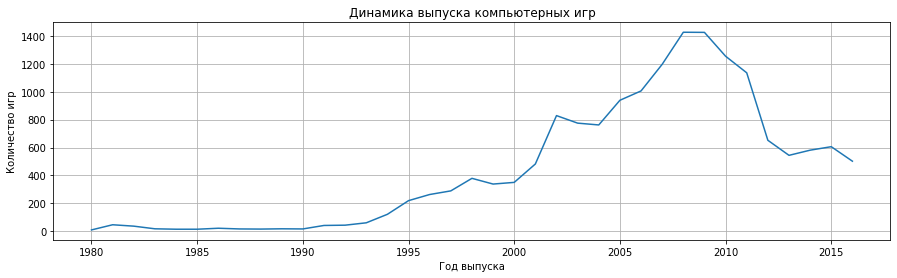

In [24]:
games[games.year_of_release != 0].groupby('year_of_release').name.count().plot(grid = True, figsize = (15, 4), title = 'Динамика выпуска компьютерных игр')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр');

Данных до 1995 года совсем мало; примерно с 2000 года начался заметный рост, а бум пришелся на 2005 - 2011 гг. Скорее всего, предпочтения пользователей компьютерных игр изменились за это время. Нас будут в большей степени интересовать данные за последние несколько лет, ведь нам нужен прогноз на 2017 год.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Попробуем понять, за какой характерный срок появляются новые и исчезают старые платформы.

In [25]:
#составим рейтинг платформ по суммарным продажам
platforms = games.groupby('platform').total_sales.sum().sort_values(ascending = False).reset_index()
platforms.head(10)

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [26]:
#сохраним топ-8 платформ
top_platforms = platforms.head(8).reset_index().platform.to_list()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4']

Посмотрим динамику выхода новых игр на наиболее популярных платформах:

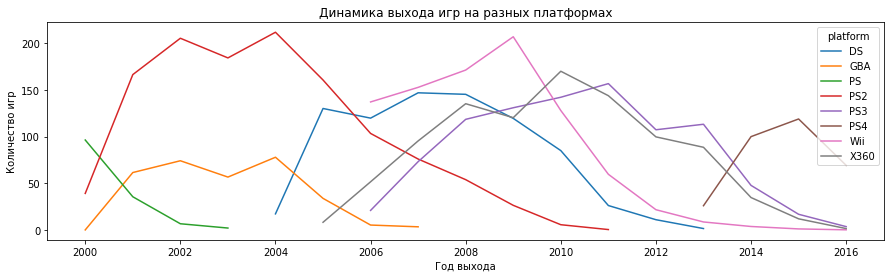

In [27]:
games[(games.platform.isin(top_platforms)) & (games.year_of_release >= 2000)]\
.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(figsize = (15, 4), title = 'Динамика выхода игр на разных платформах')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр');

Средний "срок жизни" платформы - 6-7 лет. Скорее всего, платформа PS4 будет актуальна еще пару лет. Какие еще платформы будут актуальны в 2017?

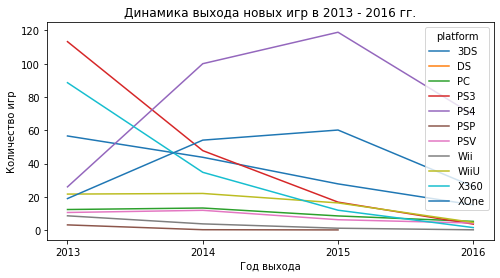

In [28]:
#посмотрим, игры на каких платформах выходили за последние 4 года
games[games.year_of_release.isin([2013, 2014, 2015, 2016])]\
.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(figsize = (8, 4), title = 'Динамика выхода новых игр в 2013 - 2016 гг.')
plt.xlabel('Год выхода')
plt.ylabel('Количество игр')
plt.xticks([2013, 2014, 2015, 2016]);

Пока заметны только две платформы, которые точно будут актуальны в 2017: PS4 и XOne. 

Видим снижение количества игр, вышедших на этих платформах в 2016, по сравнению с 2015, но вероятно, это связано с тем, что данные за 2016 год в нашем датасете неполные.

Исследуем данные за этот период времени: с 2013 по 2016 гг, включительно. Сохраним этот срез данных:

In [29]:
games1316 = games[games.year_of_release.isin([2013, 2014, 2015, 2016])]

In [30]:
#сохраним топ платформ за этот период
top_platforms1316 = games1316.groupby('platform').total_sales.sum().sort_values(ascending = False).head().reset_index().platform.to_list()
top_platforms1316

['PS4', 'PS3', 'XOne', '3DS', 'X360']

### Популярность разных платформ и жанров

Посмотрим, как распределились глобальные продажи игр по наиболее популярным платформам за интересующий нас период:

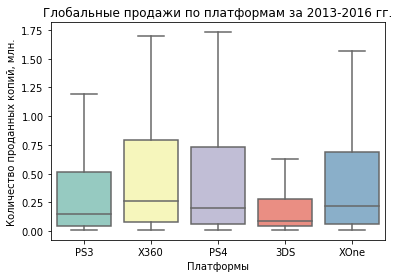

In [31]:
sns.boxplot(x = 'platform', y = 'total_sales', \
            data = games1316[games1316.platform.isin(top_platforms1316)], palette = 'Set3', sym = '')
plt.title('Глобальные продажи по платформам за 2013-2016 гг.')
plt.xlabel('Платформы')
plt.ylabel('Количество проданных копий, млн.');

Как видим, больше всего популярных игр выходит на платформах X360, PS4, XOne: здесь самые высокие значения медианы и третьего квартиля.

Теперь посмотрим, как распределены продажи в зависимости от жанра:

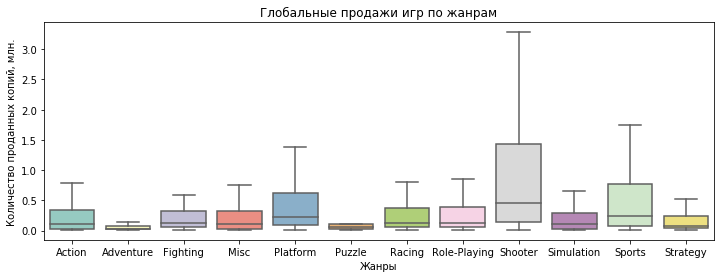

In [32]:
fig, ax = plt.subplots()
sns.boxplot(x = 'genre', y = 'total_sales', data = games1316, palette = 'Set3', sym = '')
plt.title('Глобальные продажи игр по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Количество проданных копий, млн.')
fig.set_size_inches([12, 4]);

Больше всего популярных игр - среди игр жанров Shooter, Sports, Platform.
Наименее популярные жанры - Adventure, Puzzle, Strategy.

### Корреляция продаж с оценками критиков и пользовательским рейтингом

Как коррелируют отзывы критиков и пользователей с продажами игр? Посмотрим на примере самой популярной платформы:

In [33]:
#сделаем срез по играм на платформе PS4, которые вышли в период с 2013 по 2016 год
PS4_1316 = games1316[(games1316.platform == 'PS4') & (~games1316.critic_score.isna()) & (~games1316.user_score.isna())]

Сначала посмотрим распределение оценок критиков и пользователей по играм на платформе PS4:

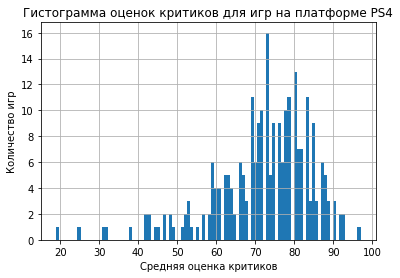

In [34]:
PS4_1316.critic_score.hist(bins = 100)
plt.title('Гистограмма оценок критиков для игр на платформе PS4')
plt.xlabel('Средняя оценка критиков')
plt.ylabel('Количество игр');

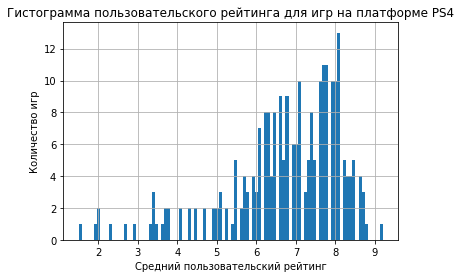

In [35]:
PS4_1316.user_score.hist(bins = 100)
plt.title('Гистограмма пользовательского рейтинга для игр на платформе PS4')
plt.xlabel('Средний пользовательский рейтинг')
plt.ylabel('Количество игр');

Критики немного более сдержаны в своих оценках, а пользователи чаще дают высокие оценки своим любимым играм (на уровне 7.5 - 8.5 баллов по 10-балльной шкале).
Но в целом распределения отзывов критиков и пользователей похожи.

Теперь посмотрим, как коррелируют продажи с оценками критиков:

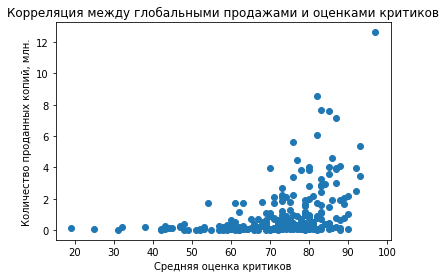

In [36]:
plt.scatter(PS4_1316.critic_score, PS4_1316.total_sales)
plt.title('Корреляция между глобальными продажами и оценками критиков')
plt.xlabel('Средняя оценка критиков')
plt.ylabel('Количество проданных копий, млн.');

Заметна прямая корреляция, но также заметен большой разброс в продажах игр, заслуживших высокие оценки критиков.

Продажи игр со средней оценкой критиков ниже 70 баллов редко превышают 1 млн копий.

А вот среди игр с высокой средней оценкой критиков (70-90 баллов) встречаются как очень успешные игры, так и совершенно не популярные.

Если оценки критиков и влияют на продажи, то это далеко не единственный фактор, определяющий коммерческий успех игры.

In [37]:
PS4_1316[PS4_1316.total_sales == PS4_1316.total_sales.max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Абсолютный рекордсмен - игра Grand Theft Auto V, с суммарными продажами более 12.6 млн копий. Заметим, что критики оценили эту игру в 97 баллов из 100, а пользователи - только на 8.3 баллов из 10. Похоже, мнения специалистов и обычных пользователей не всегда совпадают.

Теперь посмотрим, как продажи коррелируют с отзывами пользователей:

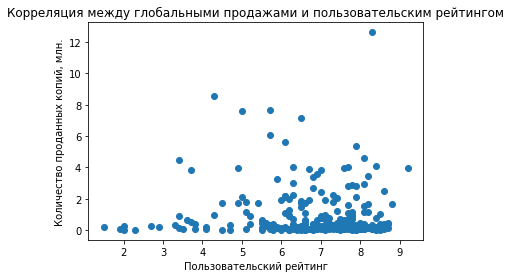

In [38]:
plt.scatter(PS4_1316.user_score, PS4_1316.total_sales)
plt.title('Корреляция между глобальными продажами и пользовательским рейтингом')
plt.xlabel('Пользовательский рейтинг')
plt.ylabel('Количество проданных копий, млн.');

Здесь также прослеживается прямая корреляция, хотя нередки случаи, когда игра очень хорошо продается, несмотря на плохие отзывы пользователей. 

В то время как высокий пользовательский рейтинг - еще совсем не гарантия коммерческого успеха.

Так же, как и в случае с оценками критиков, пользовательский рейтинг сам по себе не позволяет с уверенностью предсказать коммерческий успех игры.

Посмотрим, как коррелируют между собой оценки критиков и отзывы пользователей:

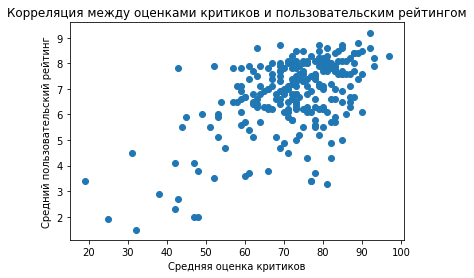

In [39]:
plt.scatter(PS4_1316.critic_score, PS4_1316.user_score)
plt.title('Корреляция между оценками критиков и пользовательским рейтингом')
plt.xlabel('Средняя оценка критиков')
plt.ylabel('Средний пользовательский рейтинг');

Есть выраженная прямая корреляция, но довольно часто мнения специалистов и обычных пользователей заметно расходятся. Даже зная оба рейтинга, мы не смогли бы с уверенностью предсказать коммерческий успех игры.

Посмотрим, как обстоят дела на других платформах:

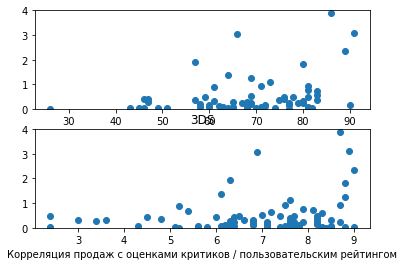

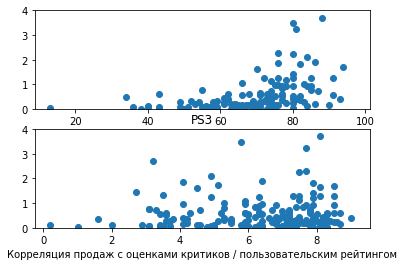

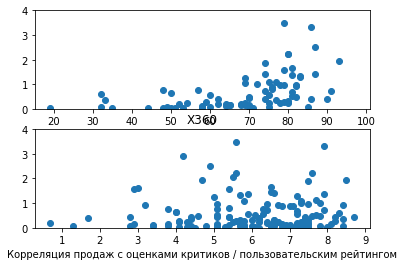

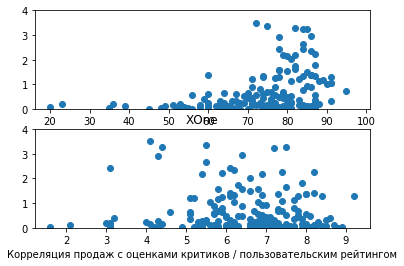

In [40]:
for group_name, group_value in games1316[games1316.platform.isin(['PS3', 'XOne', '3DS', 'X360'])] \
                                                            .groupby('platform'):
    fig, ax = plt.subplots(2, 1, sharey=True)
    plt.title(group_name)
    ax[0].scatter(group_value.critic_score, group_value.total_sales)
    ax[1].scatter(group_value.user_score, group_value.total_sales)
    ax[1].set_xlabel('Корреляция продаж с оценками критиков / пользовательским рейтингом')
    plt.ylim(0, 4)
    plt.show()

Как видим, на других популярных платформах ситуация похожая.

### Популярность разных платформ и жанров по регионам

Теперь определим самые популярные платформы и жанры для каждого отдельного региона:

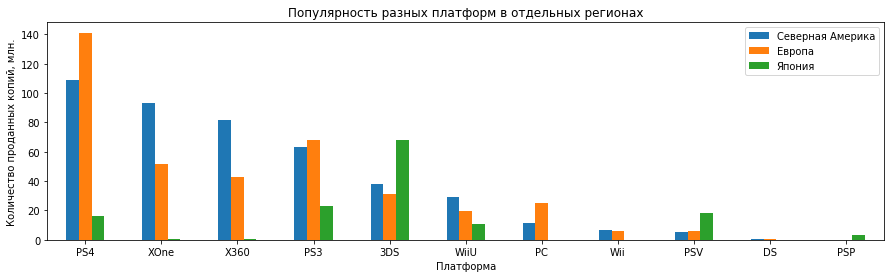

In [41]:
games1316.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').reset_index().\
sort_values('na_sales', ascending = False).set_index('platform').plot(kind = 'bar', figsize = (15, 4))
plt.title('Популярность разных платформ в отдельных регионах')
plt.xlabel('Платформа')
plt.ylabel('Количество проданных копий, млн.')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.xticks(rotation = 360);

- В Северной Америке и Европе самые популярные платформы совпадают, только в Европе XOne и X360 пока уступают PS3.

- В Японии пятерка лидеров выглядит совсем иначе: на первом месте с большим отрывом - 3DS, PS4 пока не обогнал PS3, а также популярностью пользуются PSV и WiiU.

Посмотрим, есть ли значимые различия в популярности разных жанров в разных регионах:

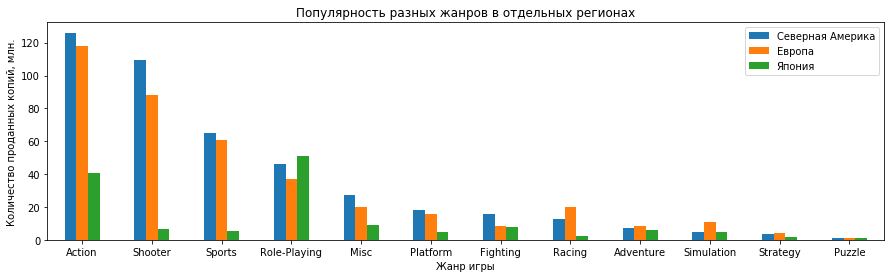

In [42]:
games1316.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].agg('sum').reset_index().\
sort_values('na_sales', ascending = False).set_index('genre').plot(kind = 'bar', figsize = (15, 4));
plt.title('Популярность разных жанров в отдельных регионах')
plt.xlabel('Жанр игры')
plt.ylabel('Количество проданных копий, млн.')
plt.legend(['Северная Америка', 'Европа', 'Япония'])
plt.xticks(rotation = 360);

- В Северной Америке и Европе самые популярные жанры совпадают: это Action и Shooter, а также Sports и Role-Playing.


- В Японии самые популярные жанры - Role-Playing и Action, а вот Shooter и Sports не пользуются особой популярностью.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельных регионах:

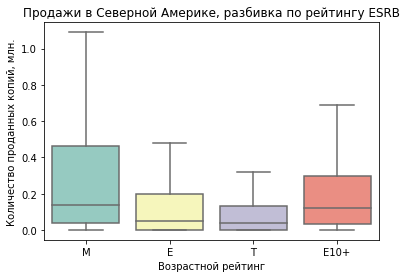

In [43]:
sns.boxplot(x = 'rating', y = 'na_sales', \
            data = games1316[~games1316.rating.isna()], palette = 'Set3', sym = '')
plt.title('Продажи в Северной Америке, разбивка по рейтингу ESRB')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество проданных копий, млн.');

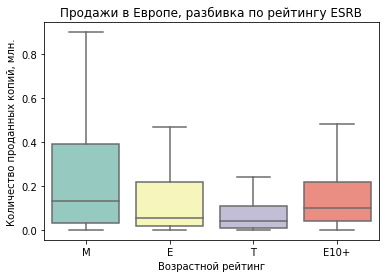

In [44]:
sns.boxplot(x = 'rating', y = 'eu_sales', \
            data = games1316[~games1316.rating.isna()], palette = 'Set3', sym = '')
plt.title('Продажи в Европе, разбивка по рейтингу ESRB')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество проданных копий, млн.');

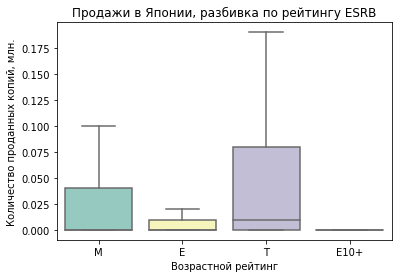

In [45]:
sns.boxplot(x = 'rating', y = 'jp_sales', \
            data = games1316[~games1316.rating.isna()], palette = 'Set3', sym = '')
plt.title('Продажи в Японии, разбивка по рейтингу ESRB')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Количество проданных копий, млн.');

И снова заметны явные различия между Северной Америкой/Европой и Японией.

- В Северной Америке и Европе наибольшей популярностью пользуются игры с возрастной маркировкой М (для взрослых).

- Также популярны игры категории Е10+ (для взрослых и детей от 10 лет), особенно в Северной Америке.

- В Японии наиболее коммерчески успешны игры, относящиеся к категории Т (для подростков от 13 лет).

**Выводы:**

- изучили динамику выхода компьютерных игр и выяснили средний "срок жизни" платформы: 6-7 лет;
    
    
- опираясь на эти данные, выбрали для анализа период с 2013 по 2016 гг. (включительно);
  
  
- выяснили, какие платформы точно будут актуальны в 2017: PS4 и XOne;
  
  
- узнали, что больше всего популярных игр за последние годы выходило на платформах X360, PS4, XOne;
  
  
- заметили, что наибольшей популярностью пользуются жанры Shooter, Sports, Platform, а наименее популярные жанры - Adventure, Puzzle, Strategy;
  
  
- выяснили, что продажи прямо коррелируют и с оценками критиков, и с пользовательским рейтингом, но напрямую не определяются этими факторами;
  
  
- заметна прямая корреляция между оценками критиков и пользовательским рейтингом, но нередки случаи, когда мнения специалистов и обычных пользователей сильно расходятся;
  
  
- топ-5 самых популярных платформ в Северной Америке и Европе почти совпадают, а в Японии совсем другая расстановка сил на рынке компьютерных игр (на первом месте с большим отрывом - платформа 3DS). Да и объем этого рынка в Японии значительно меньше;
  
  
- в Северной Америке и Европе самые популярные жанры совпадают: это Action и Shooter, а также Sports и Role-Playing. В Японии самые популярные жанры - Role-Playing и Action, а вот Shooter и Sports не пользуются особой популярностью;
  
  
- в Северной Америке и Европе наибольшей популярностью пользуются игры категории М (для взрослых), а также категории Е10+ (для взрослых и детей от 10 лет). В Японии наиболее коммерчески успешны игры, относящиеся к категории Т (для подростков от 13 лет).

[Вернуться в начало](#contents)

## Проверка гипотез <a id = 'hypotheses'></id>

### Гипотеза 1

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза: 
    
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.


Альтернативная гипотеза:
    
    - Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [46]:
# сравним средние пользовательские рейтинги двух платформ:
print('Средний пользовательский рейтинг Xbox One:', round(games[games.platform == 'XOne'].user_score.mean(), 2))
print('Средний пользовательский рейтинг PC:', round(games[games.platform == 'PC'].user_score.mean(), 2))

Средний пользовательский рейтинг Xbox One: 6.52
Средний пользовательский рейтинг PC: 7.06


Рейтинги различаются, но является ли это различие статистически значимым? Проведем Т-тест, но сначала выясним дисперсию для каждой платформы, чтобы верно указать значение параметра equal_var.

In [47]:
print('Дисперсия пользовательского рейтинга для платформы XOne:', np.var(games[games.platform == 'XOne'].user_score))
print('Дисперсия пользовательского рейтинга для платформы PC:', np.var(games[games.platform == 'PC'].user_score))

Дисперсия пользовательского рейтинга для платформы XOne: 1.8965188383045533
Дисперсия пользовательского рейтинга для платформы PC: 2.337747158036762


Дисперсии пользовательского рейтинга двух платформ отличаются незначительно.

In [48]:
alpha = 0.05
results = st.ttest_ind(games[games.platform == 'XOne'].user_score.dropna(), games[games.platform == 'PC'].user_score.dropna())
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


Итак, средние пользовательские рейтинги платформ Xbox One и PC значимо различаются.

### Гипотеза 2

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (экшн-игры) и Sports (спортивные) различаются.

Нулевая гипотеза:
    
    -Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Альтернативная гипотеза:
    
    -Средние пользовательские рейтинги жанров Action и Sports разные.

In [49]:
# сравним средние пользовательские рейтинги двух жанров:
print('Средний пользовательский рейтинг жанра экшн-игр:', games[games.genre == 'Action'].user_score.mean())
print('Средний пользовательский рейтинг жанра спортивныйх игр:', games[games.genre == 'Sports'].user_score.mean())

Средний пользовательский рейтинг жанра экшн-игр: 7.054043715846988
Средний пользовательский рейтинг жанра спортивныйх игр: 6.962522686025411


Средние рейтинги двух жанров различаются совсем незначительно. Является ли различие статистически значимым?

In [50]:
#сравним дисперсию пользовательского рейтинга двух жанров:
print('Дисперсия пользовательского рейтинга жанра экшн-игр:', np.var(games[games.genre == 'Action'].user_score))
print('Дисперсия пользовательского рейтинга жанра спортивных игр:', np.var(games[games.genre == 'Sports'].user_score))

Дисперсия пользовательского рейтинга жанра экшн-игр: 2.030636653826616
Дисперсия пользовательского рейтинга жанра спортивных игр: 2.5945754872348927


Дисперсия различается незначительно.

In [51]:
alpha = 0.05
results = st.ttest_ind(games[games.genre == 'Action'].user_score.dropna(), games[games.genre == 'Sports'].user_score.dropna())
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10920697079316033
Не получилось отвергнуть нулевую гипотезу


Таким образом, на основании наших данных нельзя утверждать, что средние пользовательские рейтинги экшн-игр и спортивных игр различаются.

**Выводы:**
        - средние пользовательские рейтинги платформ Xbox One и PC значимо различаются;
        - на основании наших данных нельзя утверждать, что средние пользовательские рейтинги экшн-игр и спортивных игр различаются.

[Вернуться в начало](#contents)

## Выводы <a id = 'summary'></id>

Как максимизировать продажи в 2017 году?

- сделать ставку на **платформы PS4 и XOne** (в Северной Америке и Европе) и **3DS** (в Японии) и отслеживать появление новых перспективных платформ;


- при планировании рекламных кампаний, нацеленных на североамериканский и европейский рынки, отдать предпочтение играм в жанрах **Action и Shooter**, а также **Sports и Role-Playing**. Японским пользователям в первую очередь рекламировать игры жаров **Role-Playing и Action**;


- в Северной Америке и Европе сделать акцент на рекламу игр **категории М (для взрослых)**, а также **категории Е10+ (для взрослых и детей от 10 лет)**. В Японии - на игры **категории Т (для подростков от 13 лет)**;


- учитывать **пользовательский рейтинг и оценки критиков**, но помнить, что коммерческий успех игры напрямую не определяется высокими оценками специалистов и обычных пользователей. Лучше ориентироваться на текущую динамику продаж.

[Вернуться в начало](#contents)